# Program 10 LSTM on Weather Data

In [151]:
import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

In [152]:
df= pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [153]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [154]:
df['Formatted Date']=pd.to_datetime(df['Formatted Date'],utc=True)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


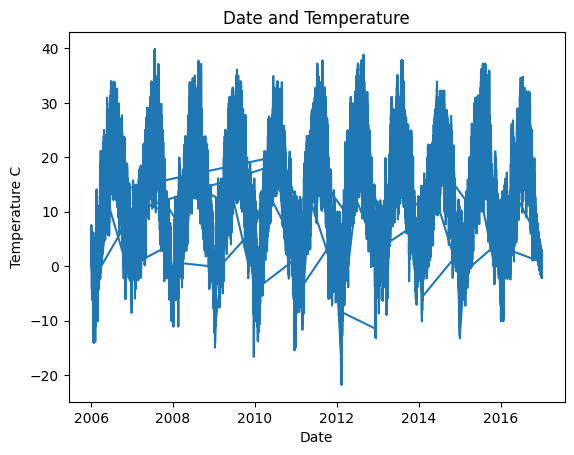

In [155]:
plt.plot(df["Formatted Date"],df['Temperature (C)'])
plt.title('Date and Temperature')
plt.xlabel('Date')
plt.ylabel("Temperature C")
plt.show()

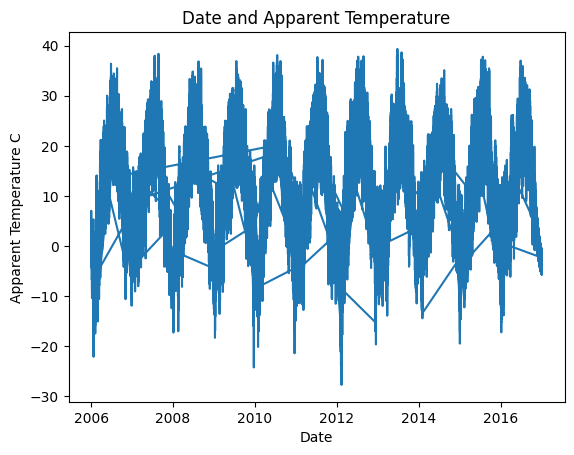

In [156]:
plt.plot(df["Formatted Date"],df['Apparent Temperature (C)'])
plt.title('Date and Apparent Temperature')
plt.xlabel('Date')
plt.ylabel("Apparent Temperature C")
plt.show()

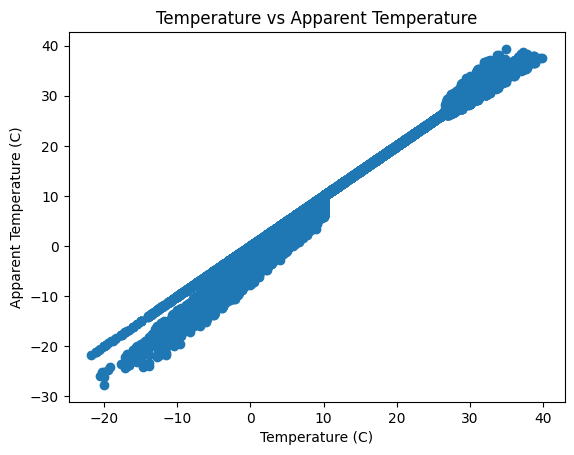

In [157]:

plt.scatter(df['Temperature (C)'], df['Apparent Temperature (C)'] )
plt.title('Temperature vs Apparent Temperature')
plt.xlabel('Temperature (C)')
plt.ylabel('Apparent Temperature (C)')
plt.show()

In [158]:
df=df.iloc[:,[0,1,2,11,3,5,6,7,8,9,10,4]]
df

,Formatted Date,Summary,Precip Type,Daily Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Apparent Temperature (C)
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,Partly cloudy throughout the day.,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13,7.388889
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,Partly cloudy throughout the day.,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,7.227778
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,Partly cloudy throughout the day.,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,9.377778
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,Partly cloudy throughout the day.,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,5.944444
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,Partly cloudy throughout the day.,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51,6.977778
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 17:00:00+00:00,Partly Cloudy,rain,Partly cloudy starting in the morning.,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,26.016667
96449,2016-09-09 18:00:00+00:00,Partly Cloudy,rain,Partly cloudy starting in the morning.,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,24.583333
96450,2016-09-09 19:00:00+00:00,Partly Cloudy,rain,Partly cloudy starting in the morning.,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,22.038889
96451,2016-09-09 20:00:00+00:00,Partly Cloudy,rain,Partly cloudy starting in the morning.,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,21.522222


In [159]:
df['Formatted Date'] = df['Formatted Date'].dt.strftime('%Y-%m-%d')

df

,Formatted Date,Summary,Precip Type,Daily Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Apparent Temperature (C)
0,2006-03-31,Partly Cloudy,rain,Partly cloudy throughout the day.,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13,7.388889
1,2006-03-31,Partly Cloudy,rain,Partly cloudy throughout the day.,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,7.227778
2,2006-04-01,Mostly Cloudy,rain,Partly cloudy throughout the day.,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,9.377778
3,2006-04-01,Partly Cloudy,rain,Partly cloudy throughout the day.,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,5.944444
4,2006-04-01,Mostly Cloudy,rain,Partly cloudy throughout the day.,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51,6.977778
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09,Partly Cloudy,rain,Partly cloudy starting in the morning.,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,26.016667
96449,2016-09-09,Partly Cloudy,rain,Partly cloudy starting in the morning.,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,24.583333
96450,2016-09-09,Partly Cloudy,rain,Partly cloudy starting in the morning.,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,22.038889
96451,2016-09-09,Partly Cloudy,rain,Partly cloudy starting in the morning.,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,21.522222


In [160]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
columns_to_encode=['Formatted Date', 'Summary', 'Precip Type', 'Daily Summary']
label_encoders={}
for i in columns_to_encode:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])
    label_encoders[i]=le

# preprocessor = ColumnTransformer(
#     transformers=[('le', LabelEncoder(), columns_to_encode)],
#     remainder='passthrough'
# )
# df_encoded = preprocessor.fit_transform(df)
# df_encoded = pd.DataFrame(df_encoded, columns=df.columns)
df

,Formatted Date,Summary,Precip Type,Daily Summary,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Apparent Temperature (C)
0,90,19,0,197,9.472222,0.89,14.1197,251.0,15.8263,0.0,1015.13,7.388889
1,90,19,0,197,9.355556,0.86,14.2646,259.0,15.8263,0.0,1015.63,7.227778
2,91,17,0,197,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,9.377778
3,91,19,0,197,8.288889,0.83,14.1036,269.0,15.8263,0.0,1016.41,5.944444
4,91,17,0,197,8.755556,0.83,11.0446,259.0,15.8263,0.0,1016.51,6.977778
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,3905,19,0,170,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,26.016667
96449,3905,19,0,170,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,24.583333
96450,3905,19,0,170,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,22.038889
96451,3905,19,0,170,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,21.522222


In [161]:

x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values


In [162]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [163]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((77162, 11, 1), (19291, 11, 1), (77162,), (19291,))

In [164]:
from tensorflow.keras.layers import *
from tensorflow.keras import *
import tensorflow
input_layer = Input(shape=(x_train.shape[1], 1))
x=LSTM(50, return_sequences=True)(input_layer)
x=Dropout(0.2)(x)
x=LSTM(50, return_sequences=False)(x)
x=Dropout(0.2)(x)
output=Dense(1)(x)
model = tensorflow.keras.Model(inputs=input_layer, outputs=output)

In [165]:
model.compile(metrics=["accuracy"],loss="mean_absolute_error",optimizer='adam')

In [167]:
history=model.fit(x_train,y_train,validation_data=[x_test,y_test],epochs=10,batch_size=32)

Epoch 1/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 6.8248e-04 - loss: 0.9481 - val_accuracy: 9.3308e-04 - val_loss: 0.3860
Epoch 2/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 35s 14ms/step - accuracy: 9.2032e-04 - loss: 0.8979 - val_accuracy: 9.8492e-04 - val_loss: 0.2715
Epoch 3/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 30s 13ms/step - accuracy: 7.3781e-04 - loss: 0.8499 - val_accuracy: 9.8492e-04 - val_loss: 0.3439
Epoch 4/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 31s 13ms/step - accuracy: 8.8367e-04 - loss: 0.8327 - val_accuracy: 9.8492e-04 - val_loss: 0.4715
Epoch 5/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 30s 12ms/step - accuracy: 7.7547e-04 - loss: 0.8186 - val_accuracy: 9.8492e-04 - val_loss: 0.3190
Epoch 6/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 7.2567e-04 - loss: 0.7984 - val_accuracy: 0.0010 - val_loss: 0.3718
Epoch 7/10
2412/2412 ━━━━━━━━━━━━━━━━━━━━ 32s 13ms/step - accuracy: 8.7811e-04 - loss: 0.7815 - val_accuracy: 0.0010 - val_loss: 0.2653
Epoch 8/10
2412/2412 ━━━━━━━

In [168]:
model.evaluate(tf.convert_to_tensor(x_test,np.float32),tf.convert_to_tensor(y_test,np.float32))

603/603 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0011 - loss: 0.2527


[0.25424501299858093, 0.0010367529466748238]

In [169]:
model.save('lstm.keras')

In [170]:
def plot_curves(history):    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

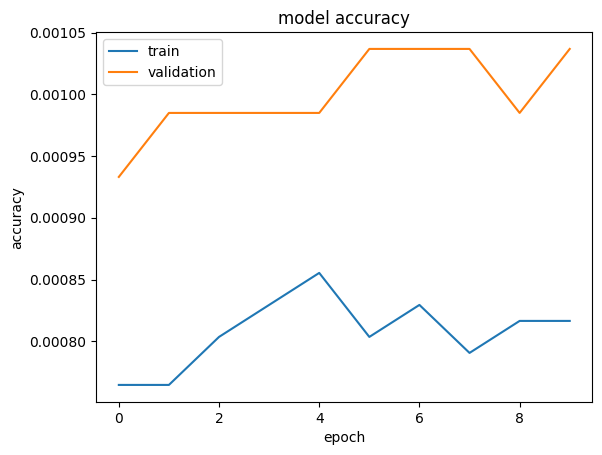

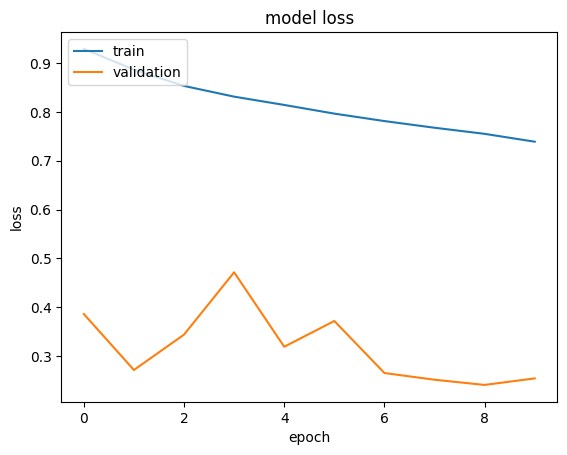

In [171]:
plot_curves(history)